<a href="https://colab.research.google.com/github/AayushiChoudhary01/Technical-Analysis-of-Stocks/blob/main/Technical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas-datareader

In [ ]:
!pip install plotly

In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import datetime as dt
import pandas_datareader.data as pdr
import yfinance as yfin
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots
pyo.init_notebook_mode(connected = True)
pd.options.plotting.backend = 'plotly'

In [ ]:
start = dt.date(2017,1,1)
end = dt.datetime.now()
stocks = ['MSFT']

In [ ]:
yfin.pdr_override()
df = pdr.get_data_yahoo(stocks, start, end)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,62.790001,62.840000,62.130001,62.580002,57.138744,20694100
2017-01-04,62.480000,62.750000,62.119999,62.299999,56.883072,21340000
2017-01-05,62.189999,62.660000,62.029999,62.299999,56.883072,24876000
2017-01-06,62.299999,63.150002,62.040001,62.840000,57.376125,19922900
2017-01-09,62.759998,63.080002,62.540001,62.639999,57.193512,20382700
...,...,...,...,...,...,...
2023-11-29,383.760010,384.299988,377.440002,378.850006,378.850006,28963400
2023-11-30,378.489990,380.089996,375.470001,378.910004,378.910004,30554400
2023-12-01,376.760010,378.160004,371.309998,374.510010,374.510010,33020400


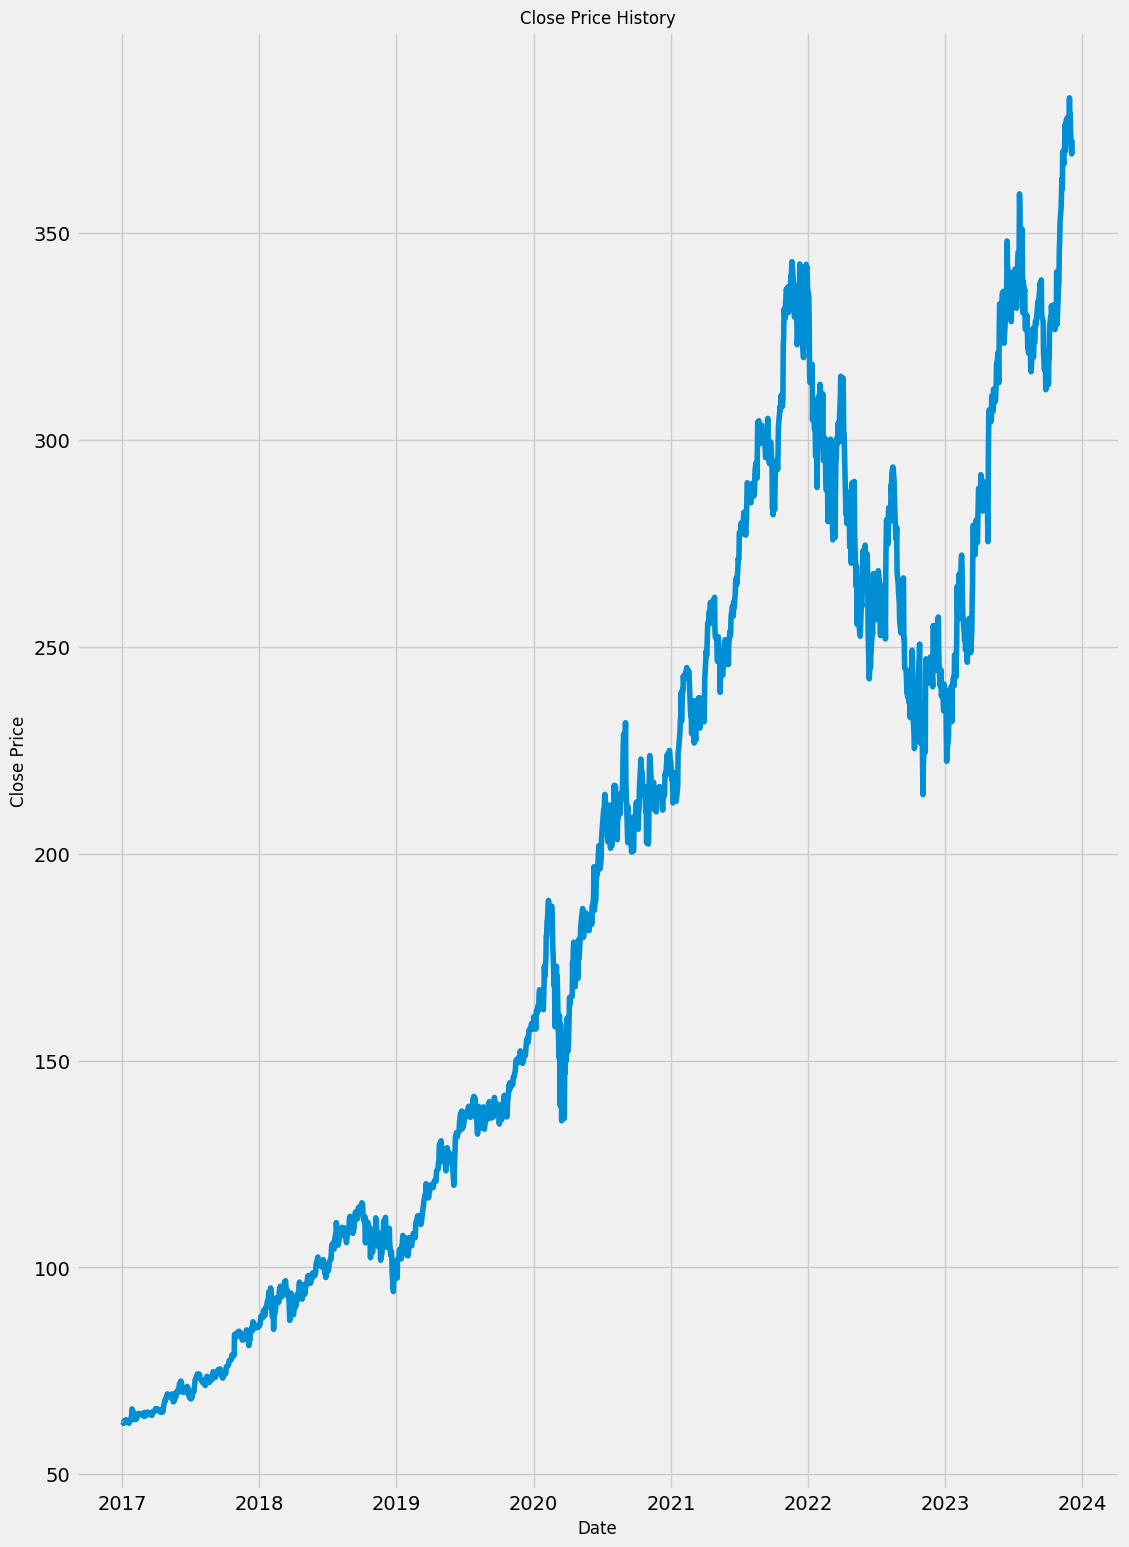

In [ ]:
# Visulaize the close price
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
plt.figure(figsize = (12,18))
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Close Price', fontsize = 12)
plt.title('Close Price History', fontsize = 12)
plt.show();

In [ ]:
def bollinger_bands(data, window_size =30):
   rolling_mean = df['Close'].rolling(window= window_size).mean() #Simple moving average
   rolling_std = df['Close'].rolling(window= window_size).std()
   df['UpperBand'] = rolling_mean + (2*rolling_std)
   df['LowerBand'] = rolling_mean - (2*rolling_std)
   return df

In [ ]:
def RSI(data, window= 13):
    delta = df['Close'].diff()
    gain = delta.where(delta>0, 0)
    loss = delta.where(delta<0, 0)
    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()
    RS = avg_gain/avg_loss
    RSI = 100 - (100/(1+RS))
    df['RSI'] = RSI
    df['Overbought'] = 70
    df['Oversold'] = 30
    return df



In [ ]:
def strategy(df):
    position = 0
    position_list = []
    buy_price = []
    buy = []
    sell = []
    sell_price = []

    for i in range(len(df)):
        if df['Close'][i] < df['LowerBand'][i] and df['RSI'][i] < df['Oversold'][i] and position == 0:
            position = 1
            buy_price.append(df['Close'][i])
            buy.append(i)
            sell_price.append(np.nan)
        elif df['Close'][i] > df['UpperBand'][i] and df['RSI'][i] > df['Overbought'][i] and position == 1:
            sell.append(i)
            position = -1
            sell_price.append(df['Close'][i])
            buy_price.append(np.nan)
        elif df['Close'][i] > df['UpperBand'][i] and df['RSI'][i] > df['Overbought'][i] and position == -1:
            buy.append(i)
            position = 0
            buy_price.append(df['Close'][i])
            sell_price.append(np.nan)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)

        position_list.append(position)

    return (buy_price, sell_price, position_list, buy, sell)

In [ ]:
df = bollinger_bands(df)
df = RSI(df)
buy_price, sell_price, position_list, buy, sell = strategy(df)
df['Buy']= buy_price
df['Sell']= sell_price

In [ ]:
sell

[355, 536, 611, 682, 864, 1116, 1213, 1318, 1530]

In [ ]:
# Adding Signal column
buy_dates = df.index[buy]
sell_dates = df.index[sell]
df['Signal']= None
df.loc[buy_dates, 'Signal']= 'BUY'
df.loc[sell_dates, 'Signal']= 'SELL'

In [ ]:
len(position_list)
len(df)
df['position']= position_list
#checking if the length of position_list and df is same

1743

1743

In [ ]:
buy_price, sell_price

([nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,UpperBand,LowerBand,RSI,Overbought,Oversold,Buy,Sell,Signal,position
Date,,,,,,,,,,,,,,,
2017-01-03,62.790001,62.840000,62.130001,62.580002,57.138744,20694100,NaN,NaN,NaN,70,30,NaN,NaN,None,0
2017-01-04,62.480000,62.750000,62.119999,62.299999,56.883072,21340000,NaN,NaN,NaN,70,30,NaN,NaN,None,0
2017-01-05,62.189999,62.660000,62.029999,62.299999,56.883072,24876000,NaN,NaN,NaN,70,30,NaN,NaN,None,0
2017-01-06,62.299999,63.150002,62.040001,62.840000,57.376125,19922900,NaN,NaN,NaN,70,30,NaN,NaN,None,0
2017-01-09,62.759998,63.080002,62.540001,62.639999,57.193512,20382700,NaN,NaN,NaN,70,30,NaN,NaN,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-29,383.760010,384.299988,377.440002,378.850006,378.850006,28963400,394.653654,317.222351,202.147657,70,30,NaN,NaN,None,0
2023-11-30,378.489990,380.089996,375.470001,378.910004,378.910004,30554400,395.888665,319.240675,300.757986,70,30,NaN,NaN,None,0
2023-12-01,376.760010,378.160004,371.309998,374.510010,374.510010,33020400,396.484382,321.524291,354.916320,70,30,NaN,NaN,None,0


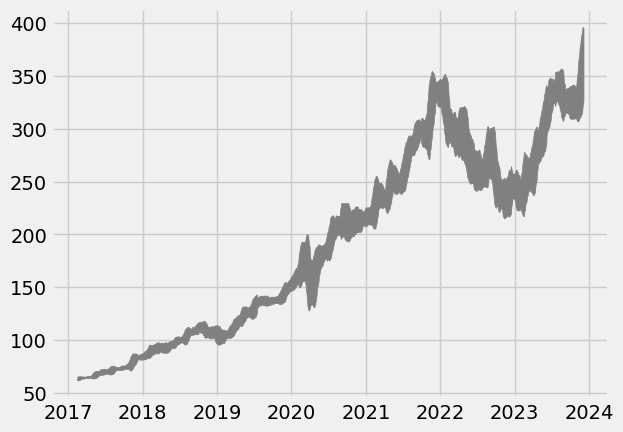

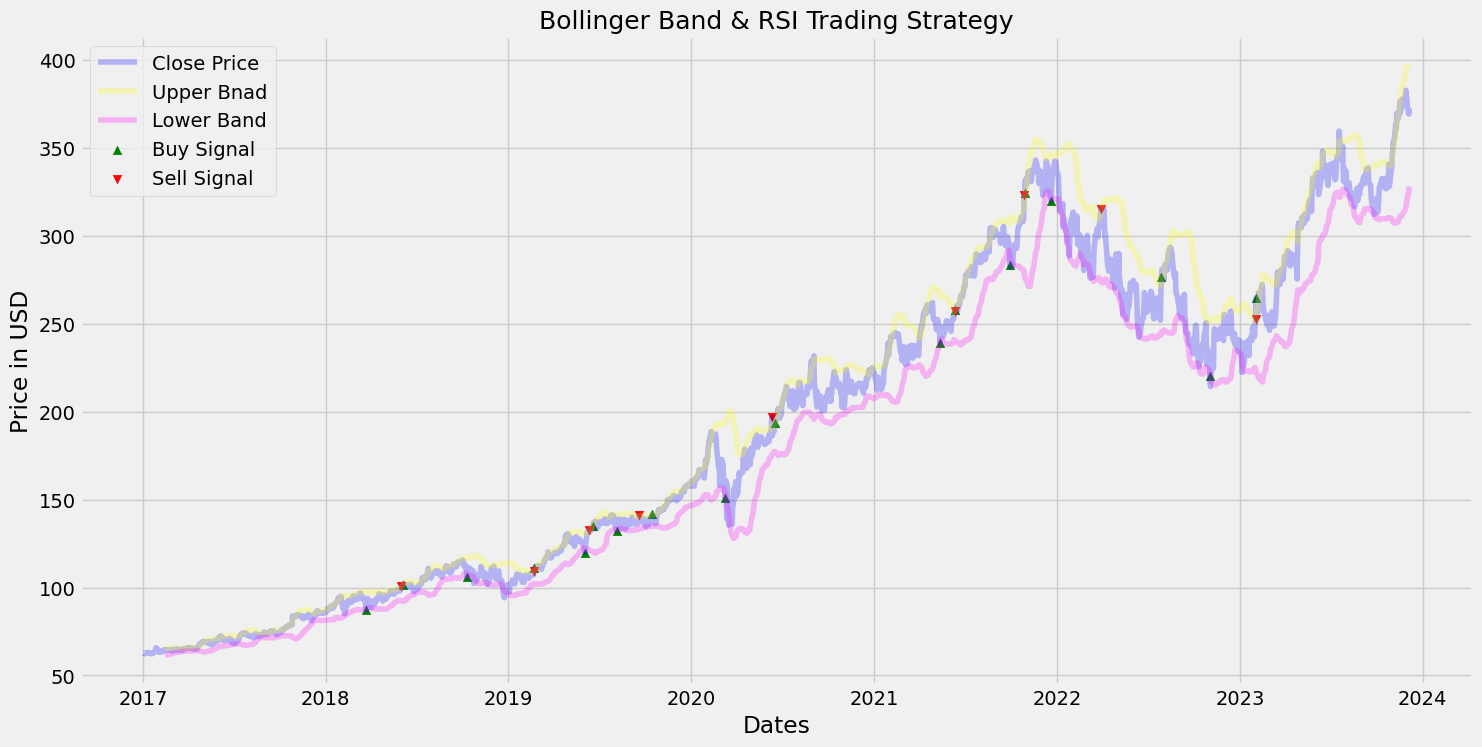

In [ ]:
# plotting upperband, lowerband, buy and sell signals
fig, ax = plt.subplots()
plt.figure(figsize = (16,8))
plt.title('Bollinger Band & RSI Trading Strategy', fontsize = 18)
plt.plot(df['Close'], alpha = 0.25, label = 'Close Price', color = 'blue')
plt.plot(df['UpperBand'], alpha = 0.25, label = 'Upper Bnad', c = 'yellow')
plt.plot(df['LowerBand'], alpha = 0.25, label = 'Lower Band', c = 'magenta')
ax.fill_between(df.index, df['UpperBand'], df['LowerBand'], color ='grey')
plt.scatter(df.index,df['Buy'],alpha =1, label = 'Buy Signal', marker = '^', color = 'green')
plt.scatter(df.index, df['Sell'], alpha =1, label = 'Sell Signal', marker = 'v', color = 'red')
plt.ylabel('Price in USD')
plt.xlabel('Dates')
plt.legend()
plt.savefig('bollinger_band.png')
plt.show();

In [ ]:
# calculating portfolio value
initial_investment = 100000
initial_price = df['Adj Close'].iloc[0]
no_of_shares_held = initial_investment / initial_price
df['portfolio_value'] = no_of_shares_held * df['Adj Close']
no_of_shares_held
df['portfolio_value']





1750.125963217205

Date
2017-01-03    100000.000000
2017-01-04     99552.540999
2017-01-05     99552.540999
2017-01-06    100415.446619
2017-01-09    100095.850214
                  ...      
2023-11-29    663035.231847
2023-11-30    663140.235132
2023-12-01    655439.691576
2023-12-04    646041.523699
2023-12-05    651956.904590
Name: portfolio_value, Length: 1743, dtype: float64

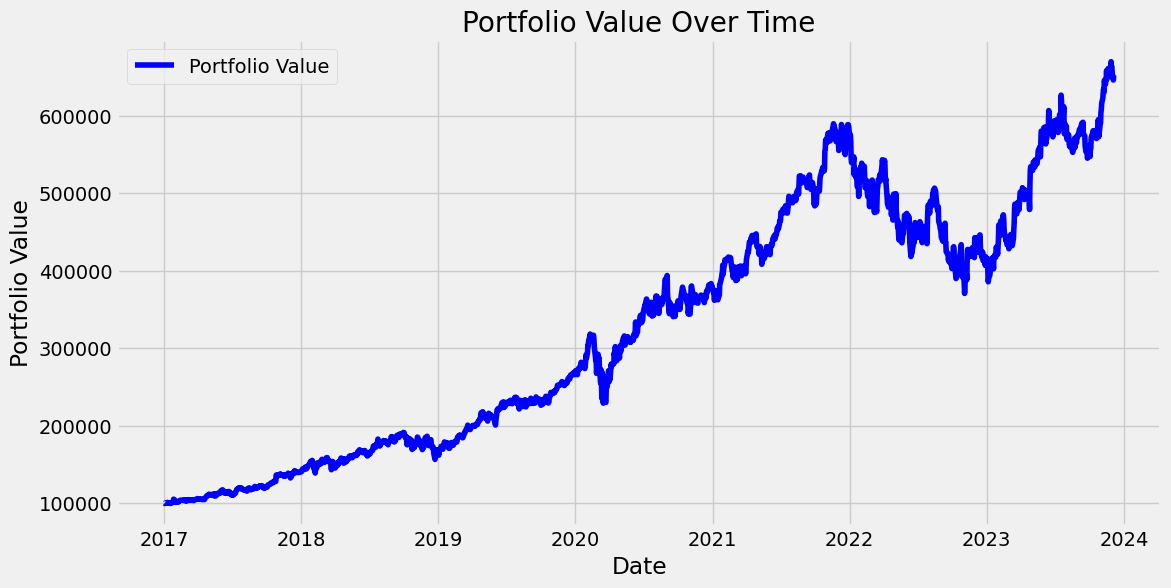

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['portfolio_value'], label='Portfolio Value', color='b')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.legend()
plt.grid(True)
plt.savefig('portfolio_value_plot.png')
plt.show();

In [ ]:
df['daily_returns'] = df['portfolio_value'].pct_change()
df['daily_returns']

Date
2017-01-03         NaN
2017-01-04   -0.004475
2017-01-05    0.000000
2017-01-06    0.008668
2017-01-09   -0.003183
                ...   
2023-11-29   -0.010060
2023-11-30    0.000158
2023-12-01   -0.011612
2023-12-04   -0.014339
2023-12-05    0.009156
Name: daily_returns, Length: 1743, dtype: float64

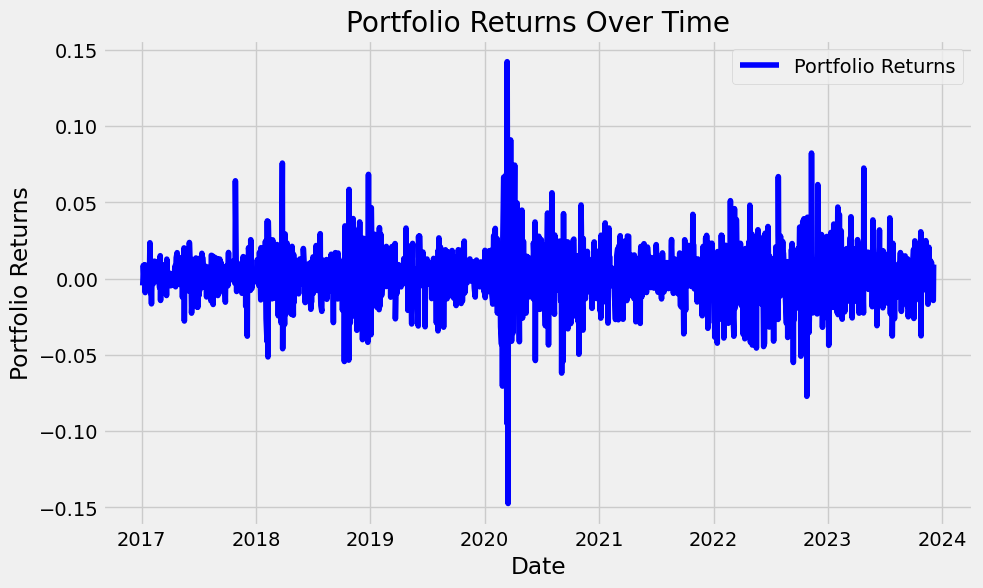

In [ ]:
# plotting portfolio returns
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['daily_returns'], label='Portfolio Returns', color='b')
plt.xlabel('Date')
plt.ylabel('Portfolio Returns')
plt.title('Portfolio Returns Over Time')
plt.legend()
plt.grid(True)
plt.savefig('portfolio_returns_plot.png')
plt.show();

In [ ]:
# Calculating strategy return
initial_investment = df['portfolio_value'][0]
final_portfolio_value = df['portfolio_value'].iloc[-1]
strategy_return = ((final_portfolio_value - initial_investment)/initial_investment)
strategy_return

5.51956904590215

In [ ]:
# Calculating benchmark
initial_index=df['Adj Close'].iloc[0]
final_index=df['Adj Close'].iloc[-1]
benchmark_return=((final_index-initial_index)/initial_index)*100
benchmark_return


551.9569045902151

In [ ]:
 # Calculating Stock Returns
df['stock_returns'] = df['Close'].pct_change()
df.dropna(subset=['stock_returns'], inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,UpperBand,LowerBand,RSI,Overbought,Oversold,Buy,Sell,Signal,position,portfolio_value,daily_returns,stock_returns
Date,,,,,,,,,,,,,,,,,,
2017-01-04,62.480000,62.750000,62.119999,62.299999,56.883072,21340000,NaN,NaN,NaN,70,30,NaN,NaN,None,0,99552.540999,-0.004475,-0.004474
2017-01-05,62.189999,62.660000,62.029999,62.299999,56.883072,24876000,NaN,NaN,NaN,70,30,NaN,NaN,None,0,99552.540999,0.000000,0.000000
2017-01-06,62.299999,63.150002,62.040001,62.840000,57.376125,19922900,NaN,NaN,NaN,70,30,NaN,NaN,None,0,100415.446619,0.008668,0.008668
2017-01-09,62.759998,63.080002,62.540001,62.639999,57.193512,20382700,NaN,NaN,NaN,70,30,NaN,NaN,None,0,100095.850214,-0.003183,-0.003183
2017-01-10,62.730000,63.070000,62.279999,62.619999,57.175255,18593000,NaN,NaN,NaN,70,30,NaN,NaN,None,0,100063.897917,-0.000319,-0.000319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-29,383.760010,384.299988,377.440002,378.850006,378.850006,28963400,394.653654,317.222351,202.147657,70,30,NaN,NaN,None,0,663035.231847,-0.010060,-0.010060
2023-11-30,378.489990,380.089996,375.470001,378.910004,378.910004,30554400,395.888665,319.240675,300.757986,70,30,NaN,NaN,None,0,663140.235132,0.000158,0.000158
2023-12-01,376.760010,378.160004,371.309998,374.510010,374.510010,33020400,396.484382,321.524291,354.916320,70,30,NaN,NaN,None,0,655439.691576,-0.011612,-0.011612


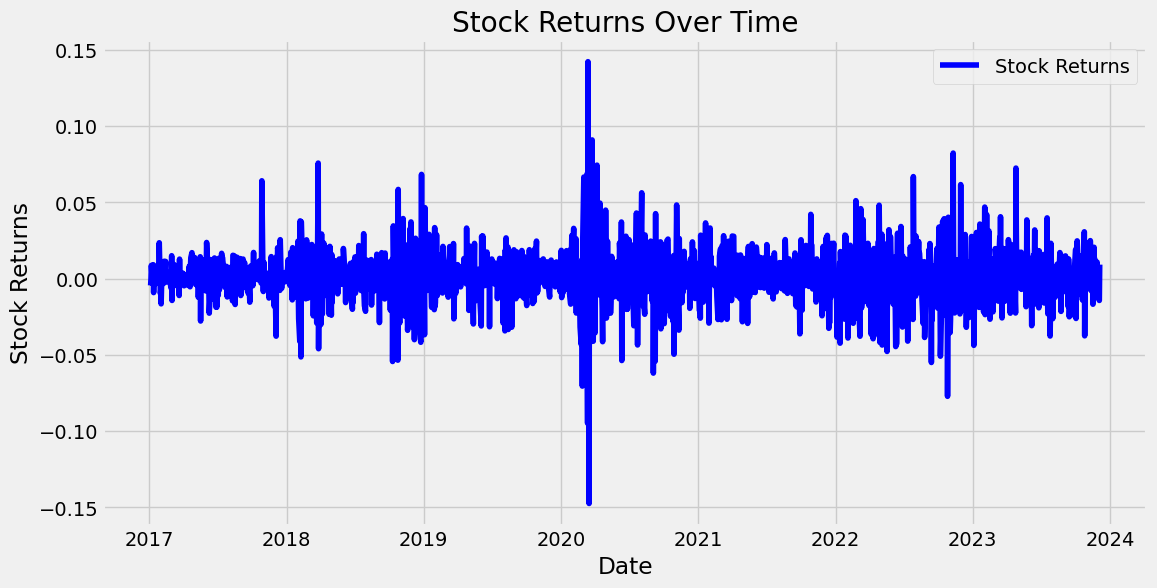

In [ ]:
# plotting stock returns
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['stock_returns'], label='Stock Returns', color='b')
plt.xlabel('Date')
plt.ylabel('Stock Returns')
plt.title('Stock Returns Over Time')
plt.legend()
plt.grid(True)
plt.savefig('Stocks_Returns.png')
plt.show();

In [ ]:
# Calculate the annualized returns
trading_days= 252
annualized_return = (1 + strategy_return) ** (trading_days / len(df.index)) - 1
print(f"Annualized Return: {annualized_return:.2%}")

Annualized Return: 31.16%


In [ ]:
log_returns = np.log(df['Close']/df['Close'].shift(1)).dropna()
log_returns

Date
2017-01-05    0.000000
2017-01-06    0.008630
2017-01-09   -0.003188
2017-01-10   -0.000319
2017-01-11    0.009061
                ...   
2023-11-29   -0.010111
2023-11-30    0.000158
2023-12-01   -0.011680
2023-12-04   -0.014443
2023-12-05    0.009115
Name: Close, Length: 1741, dtype: float64

In [ ]:
TRADING_DAYS = 252
volatility = log_returns.rolling(window = TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)
volatility


Date
2017-01-05         NaN
2017-01-06         NaN
2017-01-09         NaN
2017-01-10         NaN
2017-01-11         NaN
                ...   
2023-11-29    0.263497
2023-11-30    0.263388
2023-12-01    0.257214
2023-12-04    0.257689
2023-12-05    0.257802
Name: Close, Length: 1741, dtype: float64

In [ ]:
# Calculating Sharpe Ratio
risk_free_rate = 0.075
N = 252 # No. of trading days
# Calculate the Sharpe ratio
mean = df['daily_returns'].mean()*N - risk_free_rate
sigma = df['daily_returns'].std()*np.sqrt(N)
sharpe_ratio = mean/sigma
sharpe_ratio



0.8304105711971576

In [ ]:
# Calculating maximum drawdown
comp_ret = (df['daily_returns'] + 1).cumprod()
peak = comp_ret.expanding(min_periods=1).max()
dd = (comp_ret/peak)-1
max_drawdown = dd.min()
max_drawdown

-0.3714848887214286

In [ ]:
# win ratio
total_trades = len(df)
winning_trades = len(df[df['daily_returns']>0])

# Calculate win ratio
win_ratio = winning_trades / total_trades
win_ratio

0.5413318025258324

In [ ]:
# no. of trades
no_of_trades = len(buy) + len(sell)
no_of_trades


27

In [ ]:
# loss making trades
diff=[]
loss_making_trades=0
for i in range(len(sell)):
 diff.append(np.array(df['portfolio_value'])[buy[i]]-np.array(df['portfolio_value'])[sell[i]])
for i in range(len(diff)):
  if diff[i]<0:
    loss_making_trades=loss_making_trades+1

loss_making_trades




9

In [ ]:
# Largest Loss Trade
largest_loss_trade = df['daily_returns'].min()
print(f"Largest Loss-making Trade: {largest_loss_trade:.2%}")


Largest Loss-making Trade: -14.74%


In [ ]:
# largest profit making trade
profitable_trades = df[(df['position'] == 1) & (df['daily_returns'] > 0)]
profitable_trades
# Find the largest profit-making trade
largest_profit_trade = df['daily_returns'].max()

print(f"Largest profit making trade: {largest_profit_trade:.2%}")

,Open,High,Low,Close,Adj Close,Volume,UpperBand,LowerBand,RSI,Overbought,Oversold,Buy,Sell,Signal,position,portfolio_value,daily_returns,stock_returns
Date,,,,,,,,,,,,,,,,,,
2018-03-26,90.610001,94.000000,90.400002,93.779999,87.949051,56396800,97.115669,88.788997,-13124.690063,70,30,NaN,NaN,None,1,153921.917426,0.075705,0.075705
2018-03-29,90.180000,92.290001,88.400002,91.269997,85.595093,45867500,97.105978,88.822688,-172.181702,70,30,NaN,NaN,None,1,149802.194187,0.021031,0.021031
2018-04-03,89.580002,90.050003,87.889999,89.709999,84.132111,37213800,97.333372,88.166627,-257.487865,70,30,NaN,NaN,None,1,147241.791094,0.013443,0.013443
2018-04-04,87.849998,92.760002,87.730003,92.330002,86.589188,35560000,97.322936,88.151063,-700.000412,70,30,NaN,NaN,None,1,151541.985391,0.029205,0.029205
2018-04-05,92.440002,93.070000,91.400002,92.379997,86.636078,29771900,97.330685,88.202647,-566.666094,70,30,NaN,NaN,None,1,151624.049251,0.000542,0.000541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-20,234.860001,240.740005,234.509995,240.220001,238.108719,35389800,256.433679,222.710986,6582.604715,70,30,NaN,NaN,None,1,416720.250966,0.035744,0.035744
2023-01-23,241.100006,245.169998,239.649994,242.580002,240.447968,31934000,256.316332,222.709001,956.333923,70,30,NaN,NaN,None,1,420814.230776,0.009824,0.009824
2023-01-26,243.649994,248.309998,242.000000,248.000000,245.820328,33454500,255.012721,223.033945,145.036894,70,30,NaN,NaN,None,1,430216.537897,0.030714,0.030714


Largest profit making trade: 14.22%


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,UpperBand,LowerBand,RSI,Overbought,Oversold,Buy,Sell,Signal,position,portfolio_value,daily_returns,stock_returns
Date,,,,,,,,,,,,,,,,,,
2017-01-04,62.480000,62.750000,62.119999,62.299999,56.883072,21340000,NaN,NaN,NaN,70,30,NaN,NaN,None,0,99552.540999,-0.004475,-0.004474
2017-01-05,62.189999,62.660000,62.029999,62.299999,56.883072,24876000,NaN,NaN,NaN,70,30,NaN,NaN,None,0,99552.540999,0.000000,0.000000
2017-01-06,62.299999,63.150002,62.040001,62.840000,57.376125,19922900,NaN,NaN,NaN,70,30,NaN,NaN,None,0,100415.446619,0.008668,0.008668
2017-01-09,62.759998,63.080002,62.540001,62.639999,57.193512,20382700,NaN,NaN,NaN,70,30,NaN,NaN,None,0,100095.850214,-0.003183,-0.003183
2017-01-10,62.730000,63.070000,62.279999,62.619999,57.175255,18593000,NaN,NaN,NaN,70,30,NaN,NaN,None,0,100063.897917,-0.000319,-0.000319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-29,383.760010,384.299988,377.440002,378.850006,378.850006,28963400,394.653654,317.222351,202.147657,70,30,NaN,NaN,None,0,663035.231847,-0.010060,-0.010060
2023-11-30,378.489990,380.089996,375.470001,378.910004,378.910004,30554400,395.888665,319.240675,300.757986,70,30,NaN,NaN,None,0,663140.235132,0.000158,0.000158
2023-12-01,376.760010,378.160004,371.309998,374.510010,374.510010,33020400,396.484382,321.524291,354.916320,70,30,NaN,NaN,None,0,655439.691576,-0.011612,-0.011612


In [ ]:
# Summarizing the results here:-
print(f"Strategy Return: {strategy_return:.2%}")
print(f"Annualized Return: {annualized_return:.2%}")
print(f"Maximum Drawdown (%): {max_drawdown:.2%}")
print("Sharpe Ratio:", sharpe_ratio)
print(f'Total trades: {no_of_trades}')
print(f'Number of loss making trades {loss_making_trades}')
print(f"Win Ratio: {win_ratio}")
print(f"Largest Loss-making Trade: {largest_loss_trade:.2%}")
print(f"Largest Profit-making Trade: {largest_profit_trade:.2%}")



Strategy Return: 551.96%
Annualized Return: 31.16%
Maximum Drawdown (%): -37.15%
Sharpe Ratio: 0.8304105711971576
Total trades: 27
Number of loss making trades 9
Win Ratio: 0.5413318025258324
Largest Loss-making Trade: -14.74%
Largest Profit-making Trade: 14.22%


In [ ]:
final_df = df[['portfolio_value', 'position', 'Signal']]
final_df

,portfolio_value,position,Signal
Date,,,
2017-01-04,99552.540999,0,None
2017-01-05,99552.540999,0,None
2017-01-06,100415.446619,0,None
2017-01-09,100095.850214,0,None
2017-01-10,100063.897917,0,None
...,...,...,...
2023-11-29,663035.231847,0,None
2023-11-30,663140.235132,0,None
2023-12-01,655439.691576,0,None


In [ ]:
final_df.to_csv('deliverable.csv')